**Chapter 4 – Training Linear Models**

In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(42)


# Linear regression using the Normal Equation

$y = 4+3x$ + Gaussian_noise

In [2]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

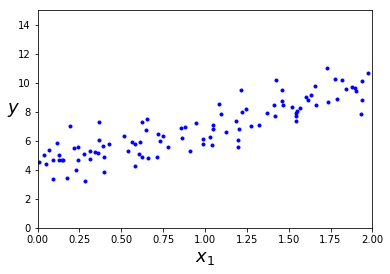

In [3]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

$y = \theta_01 +\theta_1x_1$

$\begin{equation*}
X=\begin{pmatrix}
1 & x[1] \\
1 & x[2] \\
1 & x[3]
\end{pmatrix}
\end{equation*}$

In [4]:
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance

$\theta=(X^T X)^{-1} X^T y$

Use inv() function from Numpy's Linear Alegbra Module (np.linalg)
and dot() method for matrix multiplication

In [5]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [6]:
theta_best

array([[ 4.21509616],
       [ 2.77011339]])

In [7]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.21509616],
       [ 9.75532293]])

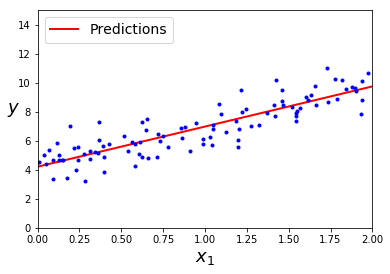

In [8]:
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(X, y, "b.")

plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
plt.show()

Use LinearRegression from sklearn.linear_model

In [9]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([ 4.21509616]), array([[ 2.77011339]]))

In [10]:
lin_reg.predict(X_new)

array([[ 4.21509616],
       [ 9.75532293]])

# Linear regression using batch gradient descent

\begin{align}
\nabla_{\theta}MSE(\theta) = \frac2mX^T(X\theta-y)\\
\theta^{n+1}=\theta^{n}-\eta\nabla_{\theta}MSE(\theta)
\end{align}

In [11]:
eta = 0.1
n_iterations = 1000
m = 100
theta = np.random.randn(2,1)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [12]:
theta

array([[ 4.21509616],
       [ 2.77011339]])

In [13]:
X_new_b.dot(theta)

array([[ 4.21509616],
       [ 9.75532293]])

In [14]:
X_new_b

array([[ 1.,  0.],
       [ 1.,  2.]])

'Yes' if fruit == 'Apple' else 'No'

In [15]:
fruit = 'Apple'
if fruit == 'Apple':
    ans = True
else:
    ans = False

print(ans)

True


In [16]:
ans = True if fruit == 'Apple' else False
print(ans)

True


In [17]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            
            #set style as "b-" if iteration > 0 else set style as "r--"
            
            style = "b-" if iteration > 0 else "r--"
            
            plt.plot(X_new, y_predict, style)
        elif iteration == n_iterations-1:
            y_predict = X_new_b.dot(theta)
            plt.plot(X_new, y_predict, 'k-')
            
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        
        if theta_path is not None:
            theta_path.append(theta)
            
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)


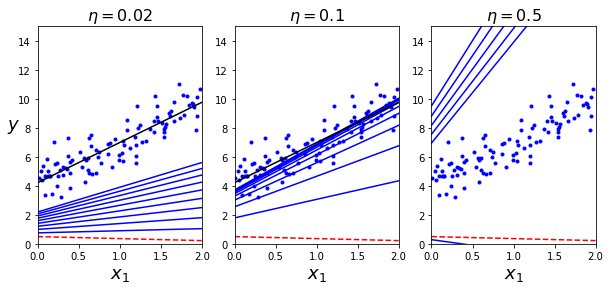

In [18]:
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

plt.show()

# Stochastic Gradient Descent

In [19]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

In [20]:
np.random.randint(10)

6

In [21]:
np.random.randn(2,1)

array([[-0.55023449],
       [ 0.51543307]])

In [22]:
# eta_path=[]
# for epoch in range(n_epochs):
#     for i in range(m):
#         eta = learning_schedule(epoch * m + i)
#         eta_path.append(eta)
# plt.plot(eta_path)
# plt.show()

In [23]:
random_index = np.random.randint(m)
X_b[random_index].reshape(-1,2)

array([[ 1.        ,  0.39743136]])

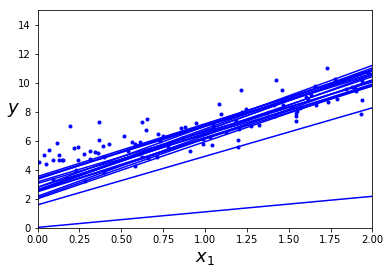

In [24]:
n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:                    # not shown in the book
            y_predict = X_new_b.dot(theta)           # not shown
            style = "b-" if i > 0 else "r--"         # not shown
            plt.plot(X_new, y_predict, style)        # not shown
        
        # select a random index from 0 ~ m
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)                 # not shown

plt.plot(X, y, "b.")                                 # not shown
plt.xlabel("$x_1$", fontsize=18)                     # not shown
plt.ylabel("$y$", rotation=0, fontsize=18)           # not shown
plt.axis([0, 2, 0, 15])                              # not shown

plt.show()                                           # not shown

In [25]:
theta

array([[ 4.20727007],
       [ 2.7427877 ]])

Use SGDRegressor for stochastic gd

In [26]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter =50, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.1,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=50, n_iter=None, penalty=None,
       power_t=0.25, random_state=42, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [27]:
sgd_reg.intercept_, sgd_reg.coef_

(array([ 4.16782089]), array([ 2.72603052]))

# Mini-batch gradient descent

In [28]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

t0, t1 = 10, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    # shuffle indices
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

In [29]:
theta

array([[ 4.25214635],
       [ 2.7896408 ]])

In [30]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

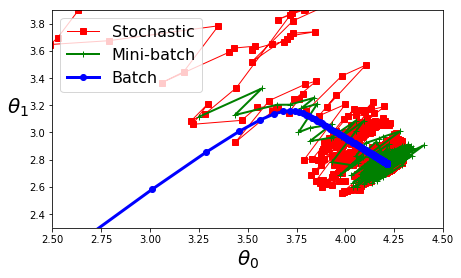

In [31]:
plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
plt.show()

# Polynomial regression

In [32]:
import numpy as np
import numpy.random as rnd

np.random.seed(42)

$y = 0.5X^2 + X + 2 +$Gaussian Noise

In [33]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

[-3, 3, 0, 10]

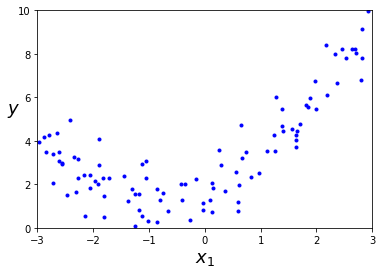

In [34]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])


feature extension with PolynomialFeatures

In [35]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=20, include_bias=False)
X_poly = poly_features.fit_transform(X)

Apply StandardScaler

In [36]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
X_poly_scaled = std_scaler.fit_transform(X_poly)

sklearn Linear Regression

In [37]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly_scaled, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

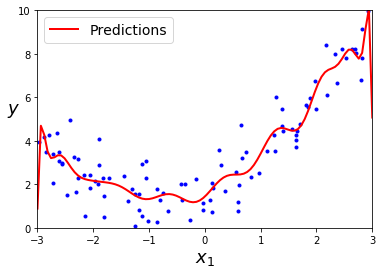

In [38]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
X_new_poly_scaled = std_scaler.transform(X_new_poly)
y_new = lin_reg.predict(X_new_poly_scaled)

plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

Make a Pipeline for PolynomialFeatures, StandardScaler, LinearRegression

[-3, 3, 0, 10]

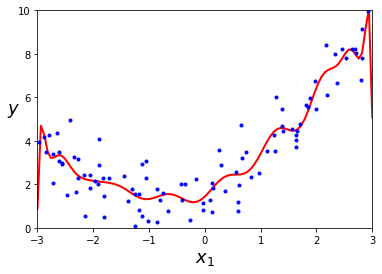

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

degree = 20
polynomial_regression = Pipeline([
            ("poly_features",  PolynomialFeatures(degree=degree, include_bias=False)),
            ("std_scaler", StandardScaler()),
            ("lin_reg", LinearRegression()),
        ])
polynomial_regression.fit(X, y)
y_newbig = polynomial_regression.predict(X_new)

plt.plot(X_new, y_newbig, "r-", label=str(degree), linewidth=2)
plt.plot(X, y, "b.")


plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])

# Regularized models

Ridge: $J(\theta)=MSE(\theta)+\alpha\frac12\sum\theta_i^2 $ 

Lasso: $J(\theta)=MSE(\theta)+\alpha\sum\lvert\theta_i\rvert $

Elastic Net: $J(\theta)=MSE(\theta)+r\alpha\sum\lvert\theta_i\rvert+(1-r)\alpha\frac12\sum\theta_i^2$

C:\Users\Daeung\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[-3, 3, 0, 10]

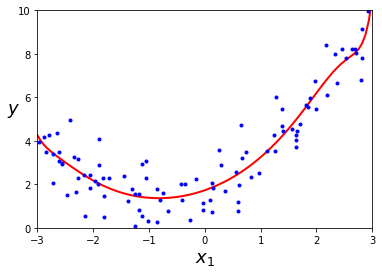

In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor

from sklearn.pipeline import Pipeline

degree = 20
alpha=1e-1
# model = Ridge(max_iter=10000, alpha=alpha)
# model = Lasso(alpha=alpha)
# model = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
model = SGDRegressor(max_iter=10000, penalty='l2', eta0=0.001, l1_ratio=0.5, random_state=42)

polynomial_regression = Pipeline([
            ("poly_features",  PolynomialFeatures(degree=degree, include_bias=False)),
            ("std_scaler", StandardScaler()),
            ("model", model),
        ])
polynomial_regression.fit(X, y)
y_newbig = polynomial_regression.predict(X_new)

plt.plot(X_new, y_newbig, "r-", label=str(degree), linewidth=2)
plt.plot(X, y, "b.")


plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

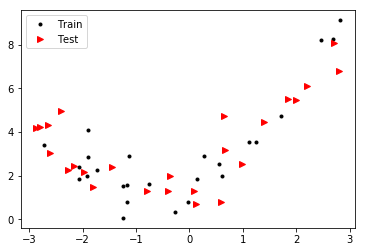

In [42]:
X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].reshape(-1), test_size=0.5, random_state=10)
plt.plot(X_train, y_train,'k.')
plt.plot(X_val, y_val,'r>')
plt.legend(['Train', 'Test'])

In [43]:
poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler()),
    ])
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

In [44]:
sgd = SGDRegressor(max_iter =1,
                       penalty=None,                       
                       eta0=0.0005,
                       warm_start=True,
                       learning_rate="constant",
                       random_state=42)

sgd_reg = SGDRegressor(max_iter =1,
                       penalty='l1',
                       alpha=0.02,
                       eta0=0.0005,
                       warm_start=True,
                       learning_rate="constant",
                       random_state=42)


In [45]:
from copy import deepcopy

n_epochs = 1000
train_errors, train_errors_reg, val_errors, val_errors_reg = [], [], [], []
minimum_val_error = float("inf")

for epoch in range(n_epochs):
    sgd.fit(X_train_poly_scaled, y_train)
    sgd_reg.fit(X_train_poly_scaled, y_train)
    
    y_train_predict = sgd.predict(X_train_poly_scaled)
    y_train_predict_reg = sgd_reg.predict(X_train_poly_scaled)
    
    y_val_predict = sgd.predict(X_val_poly_scaled)
    y_val_predict_reg = sgd_reg.predict(X_val_poly_scaled)
    
    train_errors.append(mean_squared_error(y_train_predict, y_train))
    train_errors_reg.append(mean_squared_error(y_train_predict_reg, y_train))
    val_errors.append(mean_squared_error(y_val_predict, y_val))
    val_errors_reg.append(mean_squared_error(y_val_predict_reg, y_val))
    
    val_error = mean_squared_error(y_val_predict_reg, y_val)
    if val_error < minimum_val_error:
        val_error = minimum_val_error
        best_model = deepcopy(sgd_reg)
        
    

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])
best_epoch_reg = np.argmin(val_errors_reg)
best_val_rmse_reg = np.sqrt(val_errors_reg[best_epoch])


Text(0,0.5,'RMSE')

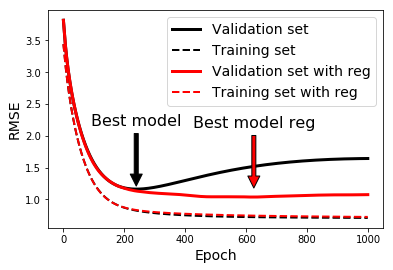

In [51]:
plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )
plt.annotate('Best model reg',
             xy=(best_epoch_reg, best_val_rmse_reg),
             xytext=(best_epoch_reg, best_val_rmse_reg + 1),
             ha="center",
             arrowprops=dict(facecolor='red', shrink=0.05),
             fontsize=16,
            )
plt.plot(np.sqrt(val_errors), "k-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "k--", linewidth=2, label="Training set")
plt.plot(np.sqrt(val_errors_reg), "r-", linewidth=3, label="Validation set with reg")
plt.plot(np.sqrt(train_errors_reg), "r--", linewidth=2, label="Training set with reg")

plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)

[-3, 3, 0, 15]

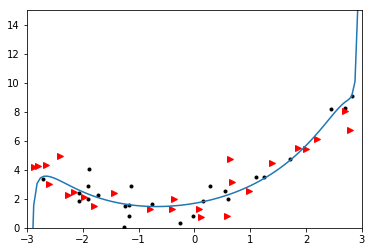

In [47]:
X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].reshape(-1), test_size=0.5, random_state=10)
plt.plot(X_train, y_train,'k.')
plt.plot(X_val, y_val,'r>')

X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_scaled = poly_scaler.transform(X_new)
y_new = best_model.predict(X_new_scaled)
plt.plot(X_new, y_new)
plt.axis([-3, 3, 0, 15])


In [48]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

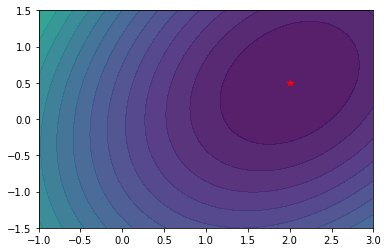

In [49]:
t1a, t1b, t2a, t2b = -1, 3, -1.5, 1.5

# ignoring bias term
t1s = np.linspace(t1a, t1b, 500)
t2s = np.linspace(t2a, t2b, 500)
t1, t2 = np.meshgrid(t1s, t2s)
T = np.c_[t1.ravel(), t2.ravel()]
Xr = np.array([[-1, 1], [-0.3, -1], [1, 0.1]])
yr = 2 * Xr[:, :1] + 0.5 * Xr[:, 1:]

J = (1/len(Xr) * np.sum((T.dot(Xr.T) - yr.T)**2, axis=1)).reshape(t1.shape)

N1 = np.linalg.norm(T, ord=1, axis=1).reshape(t1.shape)
N2 = np.linalg.norm(T, ord=2, axis=1).reshape(t1.shape)

t_min_idx = np.unravel_index(np.argmin(J), J.shape)
t1_min, t2_min = t1[t_min_idx], t2[t_min_idx]

t_init = np.array([[0.25], [-1]])

levelsJ=(np.exp(np.linspace(0, 1, 20)) - 1) * (np.max(J) - np.min(J)) + np.min(J)

plt.contourf(t1, t2, J, levels=levelsJ, alpha=0.9)
plt.plot(t1_min,t2_min,'r*')

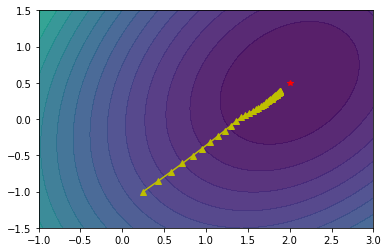

In [50]:
plt.contourf(t1, t2, J, levels=levelsJ, alpha=0.9)
plt.plot(t1_min,t2_min,'r*')

t_init = np.array([[0.25], [-1]])

def bgd_path(theta, X, y, l1, l2, core = 1, eta = 0.1, n_iterations = 50):
    path = [theta]
    for iteration in range(n_iterations):
        gradients = core * 2/len(X) * X.T.dot(X.dot(theta) - y) + l1 * np.sign(theta) + 2 * l2 * theta

        theta = theta - eta * gradients
        path.append(theta)
    return np.array(path)


path_J = bgd_path(t_init, Xr, yr, l1=0.1, l2=0)
plt.plot(path_J[:, 0], path_J[:, 1], "y-^")
